In [29]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [30]:
df = pd.read_csv("/content/Final_medicine_quality_dataset.csv")

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Active Ingredient              1100 non-null   object 
 1   Days Until Expiry              1100 non-null   int64  
 2   Storage Temperature (°C)       1100 non-null   float64
 3   Warning Labels Present         1100 non-null   float64
 4   Dissolution Rate (%)           1100 non-null   float64
 5   Disintegration Time (minutes)  1100 non-null   float64
 6   Impurity Level (%)             1100 non-null   float64
 7   Assay Purity (%)               1100 non-null   float64
 8   Safe/Not Safe                  1100 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 77.5+ KB


In [32]:
#Encode Categorical Features (Active Ingredient & Target Label)
encoder = LabelEncoder()
df["Active Ingredient"] = encoder.fit_transform(df["Active Ingredient"])

df["Safe/Not Safe"] = df["Safe/Not Safe"].map({"Safe": 1, "Not Safe": 0})


<ipython-input-33-501fa3a3cab0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Safe/Not Safe"], palette=["green", "red"])


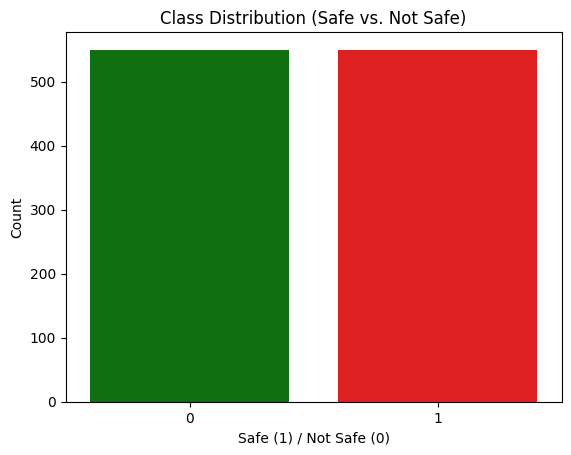

In [33]:
#Check Class Distribution (Safe vs. Not Safe)
sns.countplot(x=df["Safe/Not Safe"], palette=["green", "red"])
plt.title("Class Distribution (Safe vs. Not Safe)")
plt.xlabel("Safe (1) / Not Safe (0)")
plt.ylabel("Count")
plt.show()


In [34]:
#Feature Scaling (Standardization)
scaler = StandardScaler()
numerical_features = ["Days Until Expiry", "Storage Temperature (°C)",
                      "Dissolution Rate (%)", "Disintegration Time (minutes)",
                      "Impurity Level (%)", "Assay Purity (%)"]

df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [35]:
#Feature Selection (Check Feature Importance)

X = df.drop(columns=["Safe/Not Safe"])
y = df["Safe/Not Safe"]

model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_
feature_names = X.columns

# Display feature importance
sorted_indices = importances.argsort()[::-1]
for i in sorted_indices:
    print(f"{feature_names[i]}: {importances[i]}")


Impurity Level (%): 0.3377363947703516
Assay Purity (%): 0.31938290669395686
Dissolution Rate (%): 0.18851126710363375
Days Until Expiry: 0.050584288224605874
Storage Temperature (°C): 0.04056645625822188
Disintegration Time (minutes): 0.03718748449211087
Active Ingredient: 0.02067444615446447
Warning Labels Present: 0.005356756302654574


In [37]:
df.to_csv("ReadyForModel_medicine_quality_dataset.csv", index=False)
print("\nCleaned dataset saved as 'ReadyForModel_medicine_quality_dataset.csv'")


Cleaned dataset saved as 'ReadyForModel_medicine_quality_dataset.csv'


In [38]:
#Choosing the Best ML Algorithm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Split dataset (80% train, 20% test)
X = df.drop(columns=["Safe/Not Safe"])
y = df["Safe/Not Safe"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"🔹 {name} Accuracy: {acc:.4f}")


🔹 Random Forest Accuracy: 0.9864
🔹 SVM Accuracy: 0.8864
🔹 XGBoost Accuracy: 0.9864


In [39]:
#Hyperparameter Tuning for Random Forest
from sklearn.model_selection import GridSearchCV

# Define hyperparameters
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10]
}

# Apply Grid Search
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Best Parameters
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy after tuning: {grid_search.best_score_:.4f}")


Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 300}
Best Accuracy after tuning: 0.9807


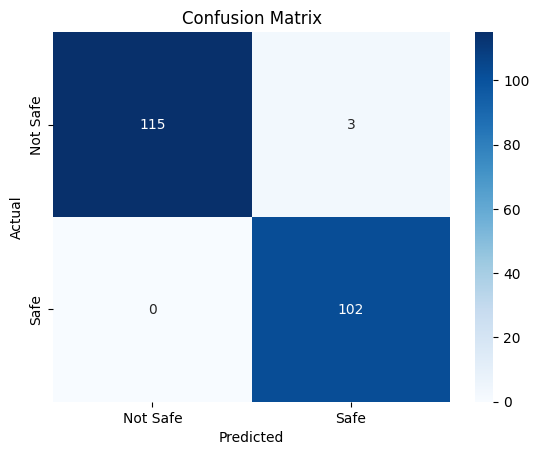

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       118
           1       0.97      1.00      0.99       102

    accuracy                           0.99       220
   macro avg       0.99      0.99      0.99       220
weighted avg       0.99      0.99      0.99       220



In [40]:
#Model Evaluation Techniques
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Use the best trained model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Safe", "Safe"], yticklabels=["Not Safe", "Safe"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("-----------------------------------------------------------------")
print(classification_report(y_test, y_pred))
